active brownian agents responding to a scalar field a la chemotaxis. so i define a nice 2d euclidean space, a scalar field representing some resource or other stimulant on that surface, and particles will move along the gradient of that field along with some intrinsic forward motion (active particles) along with some stochastic motion (brownian)

# Planning

so lets break down all the steps of what i need to do:
- Define a space for the guys to live in. They'll need coordinates $x$ and $y$ and maybe for simplicity's sake we should just confine them to be between 0 and 100 each. why not. so the space will be 100 x 100.
- Define a field for the guys to respond to. maybe should do later once i have them actually existing.
    - Brownian motion occurs in response to drag (see Factoids and Tidbits) so I think we also need to model that maybe?
- Define a Guy class (call it something else). Should have a state (position, alignment) and some parameters (speed)
- Start with maybe 10 guys or so and just have them move around.
    - The "active" part is them moving forward in whatever direction theyre aligned with
    - The "brownian" part will be stochastic updates to their alignment. I won't model it affecting speed.
    - Their direction/alignment is also affected by their response to the field. 
    - They will also need some kind of repulsion to not pile up on field minima.

# Factoids and Tidbits

Brownian motion is a manifestation of the fluctuation-dissipation theorem. Essentially, for any process in which some energy is converted to thermal energy (dissipation) there is a reverse process in which those thermal fluctuations are transmitted back to the original kind (fluctuation). So, a particle moves through a fluid and kinetic energy dissipates as heat. Conversely, as an object sits in a fluid it does not remain still, but rather jostles around as particles bump into it, where those thermal fluctuations are converted to kinetic energy of that object. That's brownian motion.

Note that this only applies to systems satisfying "detailed balance," which is when a system can be decomposed into some elementary processes, and equilibrium is the state of each of those elementary processes being balanced with their reverse process.

ACTIVE brownian particles do not obey detailed balance, as there is no reverse process for the active motion of the particles, and thus fluctuation-dissipation does not apply.

# Starting to code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

In [2]:
def V(x, y):
    """
    Potential function of 2D Cartesian coordinates. Has four minima and one maximum in the middle
    """ 
    return 10 * (x**4 - x**2 + y**4 - y**2)

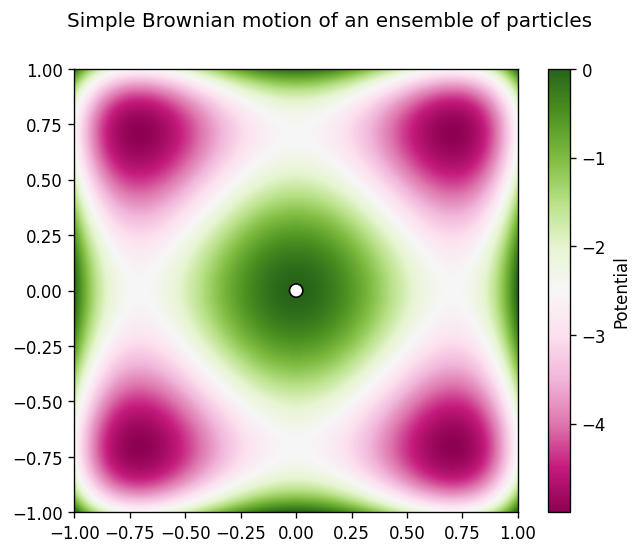

In [17]:
from matplotlib.patches import Circle
L = 1
n_pts = 500
x_range = np.linspace(-L, L, n_pts)
y_range = np.linspace(-L, L, n_pts)

X, Y = np.meshgrid(x_range, y_range)

potential = V(X, Y)

fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))
fig.suptitle("Simple Brownian motion of an ensemble of particles")
im = ax.imshow(potential, extent=(-L, L, -L, L), cmap = 'PiYG')
cbar = fig.colorbar(im, ax=ax, label="Potential")
c = Circle((0,0), 0.03, facecolor="white", edgecolor="black")
ax.add_patch(c)
plt.show()

I think a good first goal could just be animating ONE passive brownian particle. Not even in response to the field yet like baby baby steps.

In [42]:
class PassiveBrownianParticle:
    def __init__(self, id, x_i, y_i, v_i, theta_i):
        self.id = id
        self.x = x_i
        self.y = y_i

        self.v = v_i
        self.theta = theta_i

    

    def step(self, dt):
        self.x += self.v * np.cos(self.theta) * dt
        self.y += self.v * np.sin(self.theta) * dt

    def get_position(self):
        return self.x, self.y

    def draw(self):
        plt.scatter(self.x, self.y, s=50, color='white', edgecolors='black', linewidth=1)


In [43]:
import matplotlib.animation as animation

In [44]:
initx = 0
inity = 0
testParticle = PassiveBrownianParticle(1, initx, inity, 1, 0)

In [47]:
"""
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))
fig.suptitle("Simple particle animation")
im = ax.imshow(potential, extent=[-L, L, -L, L], cmap = 'PiYG')
cbar = fig.colorbar(im, ax=ax, label="Potential")

particle = ax.scatter([], [], s=50, color='white', edgecolors='black', linewidth=1)

def init():
    """#initialize animation
"""
    particle.set_offsets([[0,0]])
    return particle,

def animate(i):
    """#change and update animation
"""
    dt = 1/100
    testParticle.step(dt)
    pos = testParticle.get_position()
    particle.set_offsets([[pos[0], pos[1]]])
    return particle, 

anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True, init_func = init)
anim.save('test.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
"""

"\n    dt = 1/100\n    testParticle.step(dt)\n    pos = testParticle.get_position()\n    particle.set_offsets([[pos[0], pos[1]]])\n    return particle, \n\nanim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True, init_func = init)\nanim.save('test.mp4', fps=20, extra_args=['-vcodec', 'libx264'])\n"

In [48]:
xs = np.array([-0.5, 0, 0.5])
ys = xs.copy()

particle_xs, particle_ys = np.meshgrid(xs, ys)
print(particle_xs.reshape(-1))

[-0.5  0.   0.5 -0.5  0.   0.5 -0.5  0.   0.5]


In [52]:
L = 1
n_pts = 500
x_range = np.linspace(-L, L, n_pts)
y_range = np.linspace(-L, L, n_pts)

X, Y = np.meshgrid(x_range, y_range)

potential = V(X, Y)

plt.suptitle("Four-well potential")
plt.colorbar()
plt.imshow(potential, extent=[-L, L, -L, L], cmap = 'PiYG')
plt.show()
#plt.Circle((0,0),0.5)